# Computer Vision Contours

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Contours

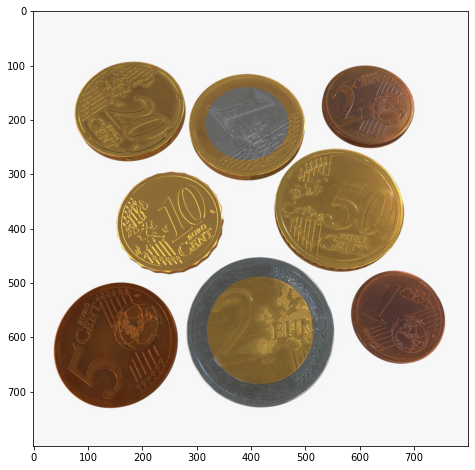

In [40]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

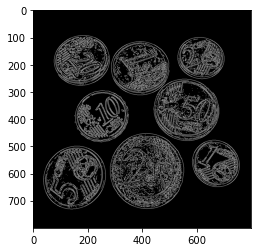

In [63]:
# Convert the image above to grayscale

gray_coins = cv2.cvtColor(color_coins, cv2.COLOR_BGR2GRAY)

# Apply some gaussian blur to it (try differente size kernels)
img_blur=cv2.GaussianBlur(gray_coins,(5,5),0)
ret, tf = cv2.threshold(img_blur, 220, 255,cv2.THRESH_BINARY_INV)

# Apply Canny to find edges and display the image 

coin_canny = cv2.Canny(img_blur,10,10)
plt.imshow(edges, cmap='gray')

In [64]:
coin_contours, hierarchy = cv2.findContours(tf, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [-1,  6, -1, -1]]], dtype=int32)

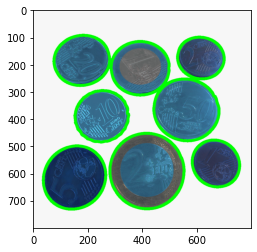

In [65]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?
coins_copy = color_coins.copy()
sorted_contour = sorted(coin_contours, key=cv2.contourArea, reverse = True)
Z= sorted_contour[0:9]

cv2.drawContours(coins_copy, Z, -2, (0, 255, 0), 10)

plt.imshow(coins_copy)

In [72]:
img_dil = cv2.dilate(coin_canny,(3,3))

In [73]:
coin_contours, hierarchy = cv2.findContours(img_dil, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

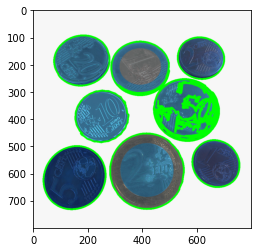

In [75]:
coins_copy = color_coins.copy()
sorted_contour = sorted(coin_contours, key=cv2.contourArea, reverse = True)
Z= sorted_contour[0:9]

cv2.drawContours(coins_copy, Z, -2, (0, 255, 0), 5)

plt.imshow(coins_copy)

[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

In [76]:
# print the number of contours that has been found
print(f'Found{len(Z)} contour(s)')

Found9 contour(s)


[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

In [22]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise


## Sorting Contours

### By area

In [77]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [84]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var
contour_area =get_contour_areas(coin_contours)

In [85]:
# Print the contour areas to screen
print(contour_area)

[41435.5, 23349.5, 15.5, 2.5, 0.0, 0.0, 1.0, 58801.5, 5.0, 78.0, 6.0, 8.0, 5.5, 20.0, 0.0, 0.0, 14.5, 2.0, 0.0, 0.0, 0.0, 1.5, 0.0, 5.5, 2.0, 0.0, 0.0, 0.0, 6.0, 0.0, 2.0, 0.0, 2.0, 3.5, 1.0, 1.0, 3.5, 1.0, 0.0, 1.5, 0.0, 3.0, 3.0, 3.5, 0.0, 0.0, 2.5, 0.0, 1.0, 6.0, 0.0, 0.0, 0.0, 7.0, 1.0, 2.5, 0.0, 0.0, 3.5, 15.5, 1.0, 3.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 6.0, 6.5, 16.5, 1.0, 0.0, 6.5, 0.0, 4.0, 2.0, 0.0, 12.0, 0.0, 0.0, 2.5, 37.5, 6.0, 0.0, 3.5, 1.5, 0.0, 1.0, 2.0, 7.0, 13.5, 1.5, 1.0, 0.0, 1.5, 0.0, 3.0, 3.0, 22.0, 0.0, 1.0, 0.0, 0.0, 2.0, 217.0, 0.0, 1.0, 1.5, 5.5, 1.5, 2.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 19.5, 1.0, 0.0, 3.0, 4.0, 0.0, 6.0, 1.0, 2.0, 1.0, 10.0, 2.0, 0.0, 0.0, 1.0, 9.0, 2.0, 15.5, 0.0, 11.0, 6.0, 3.0, 1.5, 0.0, 1.0, 0.0, 3.0, 1.5, 1.0, 1.0, 0.0, 4.5, 11.0, 2.5, 0.0, 1.5, 0.0, 4.0, 5.0, 6.5, 0.0, 15.0, 1.0, 0.0, 1.0, 0.0, 0.0, 4.5, 0.0, 0.0, 1.0, 2.5, 0.0, 4.5, 6.5, 0.0, 0.0, 6.5, 58.5, 0.0, 1.0, 6.0, 0.0, 0.0, 1.0, 3.5, 4.0, 16.5, 0.0, 0.0, 361.0, 0.0, 0.0, 13.5,

In [88]:
# Now sort the areas by biggest to smallest and print the sorted areas
sorted_contour = sorted(coin_contours, key=cv2.contourArea, reverse = True)

[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [ ]:
# Now sort the areas in the opposite way smallest to biggest and print the sorted areas


In [93]:
# Filter out only the 5 biggest contours and print them
c = sorted_contour[:5]

[Hint](# "Just slice the array!") 

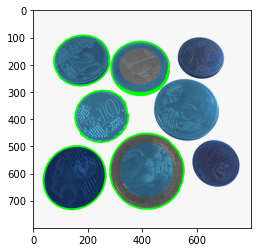

In [95]:
# Now in a clean image draw the contours you just filtered out and display it
coins_copy1 = color_coins.copy()

cv2.drawContours(coins_copy1, c, -2, (0, 255, 0), 5)

plt.imshow(coins_copy1)

In [ ]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!


### By X coordinate (left to right)

In [97]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [106]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right
def get_contour_x_center_coordinate(contours):  
    x_crds=[]
    coins_copy2 = color_coins.copy()
    for cnt in contours:
        if cv2.contourArea(cnt)>10:
            M = cv2.moments(cnt)
            x_crds = int(['m10']/M['m00'])
            y_crds = int(['m01']/M['m00'])
            x_crds.append(x_crds)
            cv2.circle(coins_copy2,(x_crds,y_crds), 10, (0,0,0),-1)
            cv2.drawContours(coins_copy2, contours, -1, (255,0,0),5)
    plt.imshow(coins_copy2, cmap ='gray')
    return x_crds

In [107]:
# Draw the contours one at a time and display the images on screen 
get_contour_x_center_coordinate(coin_contours)

TypeError: unsupported operand type(s) for /: 'list' and 'float'

[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

In [ ]:
# Can you think of other ways to sort contours?
